In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

### Get all files in the Statements folder

In [241]:
import glob
import os

folder_path = "Statements"  # Replace with the path to your folder

# Get all file paths in the folder
file_paths = glob.glob(folder_path + "/*")

all_files = []
# Iterate over the file paths and print their names
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    all_files.append(file_name)
print(all_files)

['2018.09.08 The Perth Mint.txt', '2019.02.25 Melbourne Heart Group.txt', '2019.05.24 Canva.txt', '2019.06.04 Australian National University.txt', '2020.01.16 P&N Bank.txt', '2020.01.31 The Perth Mint.txt', '2020.03.23 Henning Harders.txt', '2020.05.28 Service NSW.txt', '2020.07.20 WA Department of Health.txt', '2021.02.05 Ambulance Tasmania.txt', '2021.03.17 Eastern Health.txt', '2021.11.16 Frontier.txt', '2021.12.09 Government of South Australia.txt', '2022.00.00 Marist180.txt', '2022.05.04 National Tertiary Education Union.txt', '2022.06.03 Mercy Community.txt', '2022.09.04 Fremantle Football Club.txt', '2022.09.20 Optus.txt', '2022.10.13 Medibank.txt', '2022.10.14 MyDeal (Woolworths Group).txt', '2022.10.17 Vinomofo Australia.txt', '2022.10.27 SSKB.txt', '2022.11.00 Xavier College.txt', '2022.11.03 Harcourts.txt', '2022.11.04 BWX (Flora & Fauna).txt', '2022.11.22 The Smith Family.txt', '2022.12.09 Telstra.txt', '2022.12.13 iinet (TPG Telecom Group).txt', '2022.12.20 Medlab Patholog

### Number of statements

In [242]:
len(all_files)

40

### Read each file / statement into a string

In [243]:
def read_file_as_string(file_path):
    with open('Statements/'+file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        text = ' '.join(lines).replace("\n", "")
    return text

In [244]:
from datetime import datetime

statements = []
companies = []
dates = []
years = []

# Function to format date
def format_date(date):
    # Get date
    date_str = date

    # Convert the date string to a datetime object
    try:
        date_obj = datetime.strptime(date_str, "%Y.%m.%d")
        # Convert the datetime object to the desired format
        formatted_date = date_obj.strftime("%d/%m/%Y")
        return formatted_date
    except ValueError:
        return None  

for file_name in all_files:
    # Get statement
    statements.append(read_file_as_string(file_name))
    # Get company name from file name
    companies.append(file_name[11:-4])
    
    # Transform date into correct datetime format
    date = file_name[:10]
    formatted_date = format_date(date)
    dates.append(formatted_date)
    
    # Get year
    year = file_name[:4]
    years.append(year)

In [245]:
data = {'Name': companies, 'NotificationDate': dates, 'Year': years, 'Statement': statements}
df = pd.DataFrame(data=data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              40 non-null     object
 1   NotificationDate  37 non-null     object
 2   Year              40 non-null     object
 3   Statement         40 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


,Name,NotificationDate,Year,Statement
0,The Perth Mint,08/09/2018,2018,The Perth Mint has experienced a data breach w...
1,Melbourne Heart Group,25/02/2019,2019,Melbourne Heart Group wishes to advise all our...
2,Canva,24/05/2019,2019,"June 1, 10:13 AEST Following an investigation..."
3,Australian National University,04/06/2019,2019,"Dear all, It is with profound regret I infor..."
4,P&N Bank,16/01/2020,2020,What has happened? P&N Bank is working closel...


### Feature Engineering - Length / Count of words in the statement

In [246]:
df['Length'] = df['Statement'].apply(lambda x: len(x.split()))

In [247]:
# Average length
sum(df['Length']) / 40

556.625

### Text Preprocessing

In [248]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    # split into sentences
    sentences = sent_tokenize(text)
    
    # split into words
    tokens = word_tokenize(text)
    
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in words]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [249]:
df['CleanStatement'] = df['Statement'].apply(lambda x: preprocess(x))

In [250]:
df.head()

,Name,NotificationDate,Year,Statement,Length,CleanStatement
0,The Perth Mint,08/09/2018,2018,The Perth Mint has experienced a data breach w...,348,perth mint experienced data breach involves de...
1,Melbourne Heart Group,25/02/2019,2019,Melbourne Heart Group wishes to advise all our...,81,melbourne heart group wish advise patient cybe...
2,Canva,24/05/2019,2019,"June 1, 10:13 AEST Following an investigation...",847,june aest following investigation cyber securi...
3,Australian National University,04/06/2019,2019,"Dear all, It is with profound regret I infor...",503,dear profound regret inform victim data breach...
4,P&N Bank,16/01/2020,2020,What has happened? P&N Bank is working closel...,445,happened p n bank working closely west austral...


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              40 non-null     object
 1   NotificationDate  37 non-null     object
 2   Year              40 non-null     object
 3   Statement         40 non-null     object
 4   Length            40 non-null     int64 
 5   CleanStatement    40 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [252]:
df[df['NotificationDate'].isnull()]

,Name,NotificationDate,Year,Statement,Length,CleanStatement
13,Marist180,None,2022,"In late May 2022, Marist180 was advised by one...",531,late may advised one technology vendor ctars c...
22,Xavier College,None,2022,Xavier College cyber incident In May last yea...,600,xavier college cyber incident may last year xa...
29,Ctars,None,2023,"On the evening of 15 May 2022, we (CTARS- a cl...",1877,evening may ctars cloud based client managemen...


### Get sentiment using SiEBERT - English-Language Sentiment Classification

In [253]:
# Ref: https://huggingface.co/siebert/sentiment-roberta-large-english

from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
# print(sentiment_analysis("I love this!"))

In [254]:
# Create a function to get sentiment
def get_sentiment(text):
    sentences = sent_tokenize(text)

    sent_dict = {'Positive': 0, 'Negative': 0}

    for sentence in sentences:
        # Get sentiment for each sentence in the statement
        sentiment = sentiment_analysis(sentence)   
        if sentiment[0]['label'] == 'NEGATIVE':
            sent_dict['Negative'] += 1
        else: 
            sent_dict['Positive'] += 1
    # Check Positive or Negative has higher values
    if sent_dict['Positive'] > sent_dict['Negative']:
        return 1
    else:
        return 0

In [255]:
df['Siebert_Sentiment'] = df['Statement'].apply(lambda x: get_sentiment(x))

In [259]:
df['Siebert_Sentiment'].value_counts(normalize=True)

1    0.625
0    0.375
Name: Siebert_Sentiment, dtype: float64

In [257]:
df.head()

,Name,NotificationDate,Year,Statement,Length,CleanStatement,Siebert_Sentiment
0,The Perth Mint,08/09/2018,2018,The Perth Mint has experienced a data breach w...,348,perth mint experienced data breach involves de...,1
1,Melbourne Heart Group,25/02/2019,2019,Melbourne Heart Group wishes to advise all our...,81,melbourne heart group wish advise patient cybe...,1
2,Canva,24/05/2019,2019,"June 1, 10:13 AEST Following an investigation...",847,june aest following investigation cyber securi...,0
3,Australian National University,04/06/2019,2019,"Dear all, It is with profound regret I infor...",503,dear profound regret inform victim data breach...,1
4,P&N Bank,16/01/2020,2020,What has happened? P&N Bank is working closel...,445,happened p n bank working closely west austral...,1


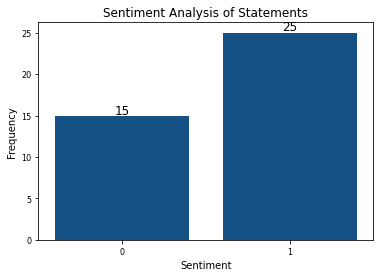

In [266]:
value_counts = df['Siebert_Sentiment'].value_counts()

# Create bar plot
plt.figure(figsize=(6, 4))
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Statements')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


In [273]:
df['Length'].max()

1900

### Import databreaches Excel file

In [275]:
# Import dataframe with Description split into 2 columns: DescriptionClean (text only - need more cleaning) & WebsiteLink

columns_to_read = ['Name', 'Day', 'Month', 'Year', 'NotificationDate', 'WebpageTitle', 'Author',
                   'DetailedExplanation', 'Whitewashing', 'Apology', 'Compensation',
                  'ResponsiveAction', 'ValueCommitment', 'CustomerFocus', 'OpenDisclosure', 'CustomerAdvice']
df_st = pd.read_csv('ausdatabreach2018-23v1.csv', usecols=columns_to_read, encoding='latin1')
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 40 non-null     object 
 1   Day                  29 non-null     float64
 2   Month                39 non-null     float64
 3   Year                 40 non-null     int64  
 4   NotificationDate     40 non-null     object 
 5   WebpageTitle         39 non-null     object 
 6   Author               10 non-null     object 
 7   DetailedExplanation  40 non-null     int64  
 8   Whitewashing         40 non-null     int64  
 9   Apology              40 non-null     int64  
 10  Compensation         40 non-null     int64  
 11  ResponsiveAction     40 non-null     int64  
 12  ValueCommitment      40 non-null     int64  
 13  CustomerFocus        40 non-null     int64  
 14  OpenDisclosure       40 non-null     int64  
 15  CustomerAdvice       40 non-null     int64

In [276]:
df_st.head()

,Name,Day,Month,Year,NotificationDate,WebpageTitle,Author,DetailedExplanation,Whitewashing,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice
0,The Perth Mint,5.0,9.0,2018,8/09/2018,The Perth Mint experiences data breach,NaN,1,1,1,0,1,0,0,0,1
1,Melbourne Heart Group,NaN,1.0,2019,25/02/2019,NaN,NaN,0,1,0,0,1,0,0,0,0
2,Canva,24.0,5.0,2019,1/06/2019,Canva Security Incident  May 24 FAQs,Head of Security,1,0,1,1,1,1,1,1,1
3,Australian National University,NaN,11.0,2018,4/06/2019,Message from the Vice-Chancellor,Vice-Chancellor,1,0,0,0,1,1,0,1,1
4,P&N Bank,12.0,12.0,2019,16/01/2020,Statement from the CEO - information breach,Chief Executive Officer,1,1,1,0,1,1,1,1,1


In [277]:
df_st.tail()

,Name,Day,Month,Year,NotificationDate,WebpageTitle,Author,DetailedExplanation,Whitewashing,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice
35,"Tasmanian Department of Education, Children an...",5.0,4.0,2023,5/04/2023,Cyber security updates for families,Principal,1,1,0,0,0,1,0,1,0
36,Ambulance Victoria,11.0,5.0,2023,19/05/2023,Notice relating to privacy breach,NaN,1,1,1,1,1,1,1,1,1
37,Xavier College,NaN,5.0,2021,00/11/2022,Cyber Incident,NaN,1,1,1,1,1,1,1,1,1
38,Ctars,15.0,5.0,2022,00/00/0000,IMPORTANT INFORMATION: CTARS DATA BREACH,NaN,1,0,1,1,1,1,1,1,1
39,Vinomofo Australia,NaN,10.0,2022,17/10/2022,Cyber Incident FAQs,NaN,1,1,0,0,1,0,0,1,1


In [278]:
df['Name'].equals(df_st['Name'])

False

In [279]:
comparison = df['Name'] != df_st['Name']

# Get the indices of the differing rows
differing_rows = comparison[comparison].index

# Print the differing rows
print(differing_rows)

Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 28, 29, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')


In [280]:
df_st['Name'].iloc[39:]

39    Vinomofo Australia
Name: Name, dtype: object

In [281]:
df['Name'].iloc[39:]

39    Queensland University of Technology
Name: Name, dtype: object

### EDA

In [282]:
df = df_st

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 40 non-null     object 
 1   Day                  29 non-null     float64
 2   Month                39 non-null     float64
 3   Year                 40 non-null     int64  
 4   NotificationDate     40 non-null     object 
 5   WebpageTitle         39 non-null     object 
 6   Author               10 non-null     object 
 7   DetailedExplanation  40 non-null     int64  
 8   Whitewashing         40 non-null     int64  
 9   Apology              40 non-null     int64  
 10  Compensation         40 non-null     int64  
 11  ResponsiveAction     40 non-null     int64  
 12  ValueCommitment      40 non-null     int64  
 13  CustomerFocus        40 non-null     int64  
 14  OpenDisclosure       40 non-null     int64  
 15  CustomerAdvice       40 non-null     int64

In [284]:
df.head()

,Name,Day,Month,Year,NotificationDate,WebpageTitle,Author,DetailedExplanation,Whitewashing,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice
0,The Perth Mint,5.0,9.0,2018,8/09/2018,The Perth Mint experiences data breach,NaN,1,1,1,0,1,0,0,0,1
1,Melbourne Heart Group,NaN,1.0,2019,25/02/2019,NaN,NaN,0,1,0,0,1,0,0,0,0
2,Canva,24.0,5.0,2019,1/06/2019,Canva Security Incident  May 24 FAQs,Head of Security,1,0,1,1,1,1,1,1,1
3,Australian National University,NaN,11.0,2018,4/06/2019,Message from the Vice-Chancellor,Vice-Chancellor,1,0,0,0,1,1,0,1,1
4,P&N Bank,12.0,12.0,2019,16/01/2020,Statement from the CEO - information breach,Chief Executive Officer,1,1,1,0,1,1,1,1,1


In [285]:
df.tail()

,Name,Day,Month,Year,NotificationDate,WebpageTitle,Author,DetailedExplanation,Whitewashing,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice
35,"Tasmanian Department of Education, Children an...",5.0,4.0,2023,5/04/2023,Cyber security updates for families,Principal,1,1,0,0,0,1,0,1,0
36,Ambulance Victoria,11.0,5.0,2023,19/05/2023,Notice relating to privacy breach,NaN,1,1,1,1,1,1,1,1,1
37,Xavier College,NaN,5.0,2021,00/11/2022,Cyber Incident,NaN,1,1,1,1,1,1,1,1,1
38,Ctars,15.0,5.0,2022,00/00/0000,IMPORTANT INFORMATION: CTARS DATA BREACH,NaN,1,0,1,1,1,1,1,1,1
39,Vinomofo Australia,NaN,10.0,2022,17/10/2022,Cyber Incident FAQs,NaN,1,1,0,0,1,0,0,1,1


In [286]:
#function to display values on barcharts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height(), fontsize=14)
                ax.text(_x, _y, value, ha="center", fontsize=12) 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width(), fontsize=14)
                ax.text(_x, _y, value, ha="left", fontsize=12)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

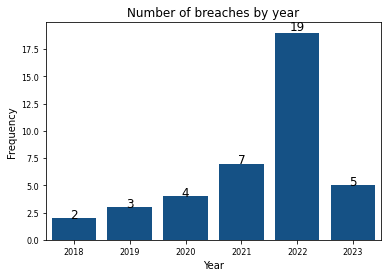

In [287]:
import seaborn as sns

# Calculate value counts
value_counts = df['Year'].value_counts()

# Create bar plot
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of breaches by year')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Percentages of each characteristics

In [288]:
df['DetailedExplanation'].value_counts(normalize=True)[1]*100

92.5

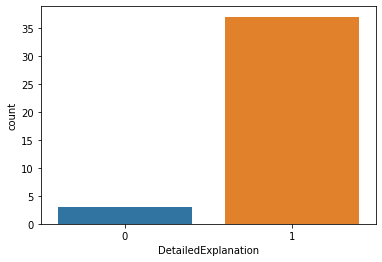

In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots()

boolean_col = ['DetailedExplanation', 'Whitewashing', 'Apology', 
               'Compensation', 'ResponsiveAction', 'ValueCommitment',
                'CustomerFocus', 'OpenDisclosure', 'CustomerAdvice']
sns.countplot(data=df, x="DetailedExplanation")
plt.show()

In [290]:
boolean_col = ['DetailedExplanation', 'Whitewashing', 'Apology', 
               'Compensation', 'ResponsiveAction', 'ValueCommitment',
                'CustomerFocus', 'OpenDisclosure', 'CustomerAdvice']

values = []
for col in boolean_col:
    pct = df[col].value_counts(normalize=True)[1]*100
    values.append(pct)

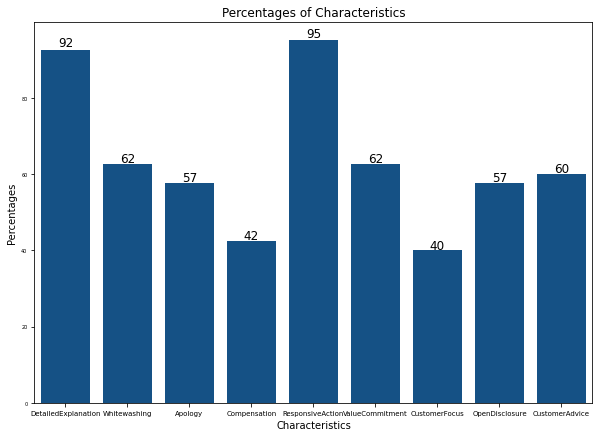

In [291]:
# Create bar plot

plt.figure(figsize=(10,7))
p = sns.barplot(x=boolean_col, y=values, color='#035397')
show_values(p)
plt.xlabel('Characteristics')
plt.ylabel('Percentages')
plt.title('Percentages of Characteristics')
plt.xticks(fontsize=7)
plt.yticks(fontsize=5)
plt.show()

### Response Grouping

In [292]:
# FullTransparency
def type1(row):
    
    if (row['DetailedExplanation'] == 1) & (row['Whitewashing'] == 0) & (row['ResponsiveAction'] == 1) & (row['ValueCommitment'] == 1)  & (row['OpenDisclosure'] == 1):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['FullTransparency'] = df.apply(type1, axis=1)

In [293]:
df[df['FullTransparency']==1].iloc[:,7:-1]

,DetailedExplanation,Whitewashing,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice
2,1,0,1,1,1,1,1,1,1
3,1,0,0,0,1,1,0,1,1
14,1,0,1,0,1,1,0,1,1
22,1,0,1,1,1,1,0,1,0
33,1,0,1,1,1,1,1,1,1
34,1,0,0,1,1,1,1,1,1
38,1,0,1,1,1,1,1,1,1


In [294]:
# Guarded
def type2(row):
    
    if (row['DetailedExplanation'] == 0) & (row['Whitewashing'] == 1) & (row['ResponsiveAction'] == 1) & (row['ValueCommitment'] == 1)  & (row['OpenDisclosure'] == 0):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['Guarded'] = df.apply(type2, axis=1)

In [295]:
# Opacity
def type3(row):
    
    if (row['DetailedExplanation'] == 0) & (row['Whitewashing'] == 1) & (row['ResponsiveAction'] == 1) & (row['ValueCommitment'] == 0)  & (row['OpenDisclosure'] == 0):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['Opacity'] = df.apply(type3, axis=1)

In [296]:
# CustomerInterest
def type4(row):
    
    if (row['Apology'] == 1) & (row['Compensation'] == 1) & (row['CustomerFocus'] == 1) & (row['CustomerAdvice'] == 1):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['CustomerInterest'] = df.apply(type4, axis=1)

In [297]:
# CustomerInterest
def type5(row):
    
    if (row['Apology'] == 1) & (row['Compensation'] == 0):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['BalancedInterest'] = df.apply(type5, axis=1)

In [298]:
# CustomerInterest
def type6(row):
    
    if (row['Apology'] == 0) & (row['Compensation'] == 0) & (row['CustomerFocus'] == 0) & (row['CustomerAdvice'] == 0):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['CompanyInterest'] = df.apply(type6, axis=1)

In [299]:
df.iloc[:5,7:]

,DetailedExplanation,Whitewashing,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice,FullTransparency,Guarded,Opacity,CustomerInterest,BalancedInterest,CompanyInterest
0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0
3,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0
4,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0


### Percentages of each response types

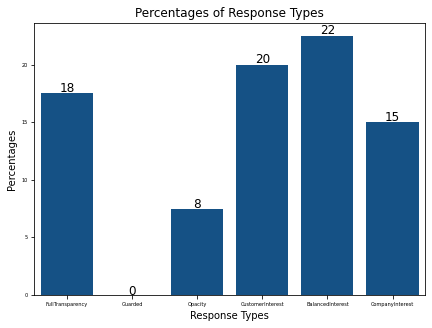

In [300]:
response_col = ['FullTransparency', 'Guarded', 'Opacity', 
               'CustomerInterest', 'BalancedInterest', 'CompanyInterest']

values_pct = []
for col in response_col:
    # If there is only one value 
    if len(df[col].value_counts(normalize=True)) == 1:
        values_pct.append(0)
        
    else:
        pct = df[col].value_counts(normalize=True)[1]*100
        
        values_pct.append(pct)
    
# Create bar plot

plt.figure(figsize=(7,5))
p = sns.barplot(x=response_col, y=values_pct, color='#035397')
show_values(p)
plt.xlabel('Response Types')
plt.ylabel('Percentages')
plt.title('Percentages of Response Types')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

In [301]:
df['BalancedInterest'].value_counts(normalize=True)[1]*100

22.5

### Bigrams for titles

In [302]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [303]:
# Ref: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

# Lemmatize with POS Tag
from nltk.corpus import wordnet
# nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [304]:
def preprocess(text):
    try: 
        # split into sentences
        sentences = sent_tokenize(text)

        # split into words
        tokens = word_tokenize(text)

        # convert to lower case
        tokens = [w.lower() for w in tokens]

        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]

        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]

        # filter out stop words
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]

        # Lemmatise the tokens
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

        # Join the tokens back into a string
        processed_text = ' '.join(lemmatized_tokens)
        return processed_text
    except TypeError:
        return ""

In [305]:
df['Title_nltk'] = df['WebpageTitle'].apply(lambda x: preprocess(x))

In [306]:
df['Title_nltk'].head()

0    perth mint experience data breach
1                                     
2      canva security incident may faq
3               message vicechancellor
4     statement ceo information breach
Name: Title_nltk, dtype: object

In [307]:
from nltk.util import ngrams

def bigrams_convert(column, n=2):
    df['bigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    
def trigrams_convert(column, n=3):
    df['trigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))

In [308]:
bigrams_convert('Title_nltk')
trigrams_convert('Title_nltk')

In [309]:
df.head()

,Name,Day,Month,Year,NotificationDate,WebpageTitle,Author,DetailedExplanation,Whitewashing,Apology,...,CustomerAdvice,FullTransparency,Guarded,Opacity,CustomerInterest,BalancedInterest,CompanyInterest,Title_nltk,bigrams_Title_nltk,trigrams_Title_nltk
0,The Perth Mint,5.0,9.0,2018,8/09/2018,The Perth Mint experiences data breach,NaN,1,1,1,...,1,0,0,0,0,1,0,perth mint experience data breach,"[(perth, mint), (mint, experience), (experienc...","[(perth, mint, experience), (mint, experience,..."
1,Melbourne Heart Group,NaN,1.0,2019,25/02/2019,NaN,NaN,0,1,0,...,0,0,0,1,0,0,1,,[],[]
2,Canva,24.0,5.0,2019,1/06/2019,Canva Security Incident  May 24 FAQs,Head of Security,1,0,1,...,1,1,0,0,1,0,0,canva security incident may faq,"[(canva, security), (security, incident), (inc...","[(canva, security, incident), (security, incid..."
3,Australian National University,NaN,11.0,2018,4/06/2019,Message from the Vice-Chancellor,Vice-Chancellor,1,0,0,...,1,1,0,0,0,0,0,message vicechancellor,"[(message, vicechancellor)]",[]
4,P&N Bank,12.0,12.0,2019,16/01/2020,Statement from the CEO - information breach,Chief Executive Officer,1,1,1,...,1,0,0,0,0,1,0,statement ceo information breach,"[(statement, ceo), (ceo, information), (inform...","[(statement, ceo, information), (ceo, informat..."


In [310]:
from collections import Counter

bigrams = []
for row in df['bigrams_Title_nltk']:
    bigrams.extend(row)
    
print(f'Count of bigrams: {len(bigrams)}')
print("\n")
    
# Count the frequency of each bigram
bigram_frequency = Counter(bigrams)

# Print the frequency of each bigram
# for bigram, frequency in bigram_frequency.items():
#     print(bigram, frequency)
    
# Organize elements by frequency using most_common()
bigrams_organized_by_frequency = bigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in bigrams_organized_by_frequency:
    print(element, frequency)

Count of bigrams: 128


('data', 'breach') 12
('cyber', 'incident') 10
('ctars', 'data') 3
('security', 'incident') 2
('frontier', 'software') 2
('breach', 'notification') 2
('incident', 'response') 2
('important', 'information') 2
('medium', 'statement') 2
('cyber', 'security') 2
('perth', 'mint') 1
('mint', 'experience') 1
('experience', 'data') 1
('canva', 'security') 1
('incident', 'may') 1
('may', 'faq') 1
('message', 'vicechancellor') 1
('statement', 'ceo') 1
('ceo', 'information') 1
('information', 'breach') 1
('visitor', 'information') 1
('information', 'unlawfully') 1
('unlawfully', 'gain') 1
('henning', 'harders') 1
('harders', 'client') 1
('client', 'information') 1
('service', 'nsw') 1
('nsw', 'cyber') 1
('clarification', 'report') 1
('report', 'data') 1
('ambulance', 'tasmania') 1
('tasmania', 'pager') 1
('pager', 'message') 1
('cyberincident', 'updatemedia') 1
('updatemedia', 'statement') 1
('software', 'cyber') 1
('mydeal', 'data') 1
('ceo', 'update') 1
('update', 'incor

Bigram: data breach - Frequency: 12
Bigram: cyber incident - Frequency: 10
Bigram: ctars data - Frequency: 3
Bigram: security incident - Frequency: 2
Bigram: frontier software - Frequency: 2


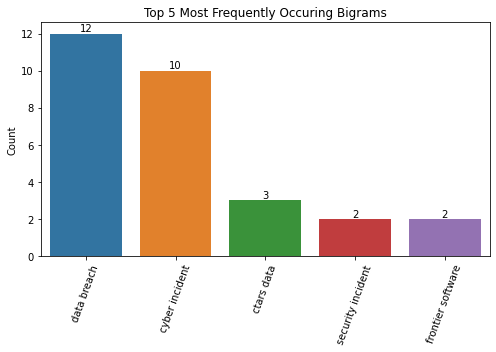

In [311]:
import seaborn as sns

bigrams_organized_by_frequency_10 = bigram_frequency.most_common(5)

# Print the elements organized by frequency
# print('Top 10 trigrams')
bi = []
freq = []

for element, frequency in bigrams_organized_by_frequency_10:
    bigram = ' '.join(element)
    print(f'Bigram: {bigram} - Frequency: {frequency}')
    bi.append(bigram)
    freq.append(frequency)


df_bi = pd.DataFrame({'Bigram': bi, 'Count': freq})

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=df_bi['Bigram'].values, y=df_bi['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 5 Most Frequently Occuring Bigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [312]:
trigrams = []
for row in df['trigrams_Title_nltk']:
    trigrams.extend(row)
    
print(f'Count of trigrams: {len(trigrams)}')
print("\n")
    
# Count the frequency of each trigram
trigram_frequency = Counter(trigrams)

# Organize elements by frequency using most_common()
trigrams_organized_by_frequency = trigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in trigrams_organized_by_frequency:
    print(element, frequency)

Count of trigrams: 89


('ctars', 'data', 'breach') 3
('data', 'breach', 'notification') 2
('cyber', 'incident', 'response') 2
('perth', 'mint', 'experience') 1
('mint', 'experience', 'data') 1
('experience', 'data', 'breach') 1
('canva', 'security', 'incident') 1
('security', 'incident', 'may') 1
('incident', 'may', 'faq') 1
('statement', 'ceo', 'information') 1
('ceo', 'information', 'breach') 1
('visitor', 'information', 'unlawfully') 1
('information', 'unlawfully', 'gain') 1
('henning', 'harders', 'client') 1
('harders', 'client', 'information') 1
('service', 'nsw', 'cyber') 1
('nsw', 'cyber', 'incident') 1
('clarification', 'report', 'data') 1
('report', 'data', 'breach') 1
('ambulance', 'tasmania', 'pager') 1
('tasmania', 'pager', 'message') 1
('cyberincident', 'updatemedia', 'statement') 1
('frontier', 'software', 'cyber') 1
('software', 'cyber', 'incident') 1
('mydeal', 'data', 'breach') 1
('ceo', 'update', 'incorrect') 1
('update', 'incorrect', 'semifinal') 1
('incorrect', 'se

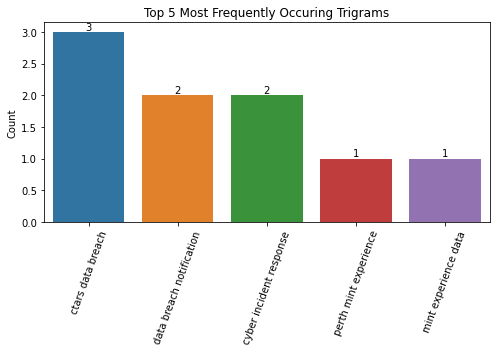

In [313]:
trigrams_organized_by_frequency_10 = trigram_frequency.most_common(5)

# Print the elements organized by frequency
# print('Top 10 trigrams')
tri = []
freq = []

for element, frequency in trigrams_organized_by_frequency_10:
    trigram = ' '.join(element)
#     print(f'Trigram: {trigram} - Frequency: {frequency}')
    tri.append(trigram)
    freq.append(frequency)
    
df_tri = pd.DataFrame({'Trigram': tri, 'Count': freq})

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=df_tri['Trigram'].values, y=df_tri['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 5 Most Frequently Occuring Trigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

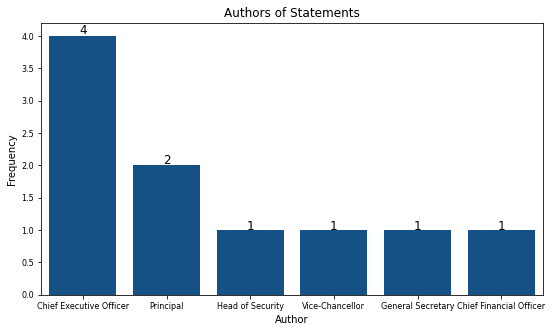

In [314]:
# Calculate value counts
value_counts = df['Author'].value_counts(dropna=False)

# Create bar plot
plt.figure(figsize=(9, 5))
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.title('Authors of Statements')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [315]:
df['Author'].value_counts(dropna=False)

NaN                        30
Chief Executive Officer     4
Principal                   2
Head of Security            1
Vice-Chancellor             1
General Secretary           1
Chief Financial Officer     1
Name: Author, dtype: int64

In [316]:
# df.to_excel('output.xlsx', index=False)

In [317]:
# df.drop(['CleanStatement2'], axis=1, inplace=True)

In [318]:
# initialize NLTK sentiment analyzer
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# analyzer = SentimentIntensityAnalyzer()

# # create get_sentiment function
# def get_sentiment(text):
#     scores = analyzer.polarity_scores(text)
#     sentiment = 1 if scores['pos'] > 0 else 0
#     return sentiment